MSZoning
Street
Alley
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


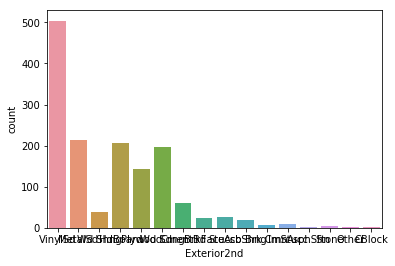

In [83]:
import os
import scipy as sp
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# グラフをインラインで表示させる
%matplotlib inline
df_train = pd.read_csv('./train.csv')

target_var = "SalePrice"
var = "Street"



columns = list(df_train.columns)
columns.remove("Id")
columns.remove("SalePrice")

for col in columns:
    #print(col)
    if (df_train[col].dtypes == object):
        print(col)





#plt.figure(figsize=(16,8))

#df_train.loc[df_train[var].isnull()==True,var]= 0


#data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
#data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000),figsize=(12,9))

#plt.figure(figsize=(16,8)) #figsize調整
#plt.hist(df_train[var])
#plt.show()


var = 'Exterior2nd'
#print(df_train.loc[:,[var]])

#f, axes = plt.subplots(1, 2)

#plt.subplots_adjust(wspace = 0.5)

#print(data)

data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

sns.countplot(x = var, data = df_train)
#fig = sns.barplot(x=var, y="SalePrice", data = data, ax=axes[0])

#plt.figure(figsize=(16,8)) #figsize調整
#plt.hist( df_train[var],bins=8,rwidth=0.5)

#fig = sns.boxplot(x=var, y="SalePrice", data=data)

#fig = sns.distplot(list(df_train[var]))


In [129]:
import os
import scipy as sp
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# グラフをインラインで表示させる
%matplotlib inline
#df_train = pd.read_csv('./train.csv')

#target_var = "SalePrice"
#var = "Street"


def preprocess(train_flg):
    # train set の場合の処理
    if train_flg:
        df=pd.read_csv('./train.csv')
        #df = df.dropna()
        #df.drop(df[df['GrLivArea']>=4000].index,inplace=True)
        df_y = df['SalePrice']
    else:
        df=pd.read_csv('./test.csv')
    # 使う変数を定義
    var_list = ["BsmtQual","ExterQual","KitchenQual","OverallQual","TotRmsAbvGrd","TotalBsmtSF","1stFlrSF","GrLivArea","GarageArea"]
    
    df_x = df.loc[:,var_list]
    
    
    #欠損値　-> 'NA'　に変換
    df_x.loc[df_x['BsmtQual'].isnull()==True,'BsmtQual']='NA'
    df_x.loc[df_x['TotalBsmtSF'].isnull()==True,'TotalBsmtSF']= 0
    df_x.loc[df_x['KitchenQual'].isnull()==True,'KitchenQual']= 'TA'
    df_x.loc[df_x['GarageArea'].isnull()==True,'GarageArea'] = 412
    
    print(df_x.isnull().sum())
    
    # dummy
    df_x=pd.get_dummies(df_x)
    # train set の場合のoutput
    if train_flg:
        return df_x,df_y
    # test set の場合のoutput、kaggleへ提出するファイルの規定により、idも一緒に出力する
    else:
        return df_x,df['Id']






# train set
# 前処理の統合変数を使う
df_x,df_y = preprocess(train_flg=True)

# linear regressionで検証
clf = LinearRegression()
clf.fit(df_x, df_y)
rmse(clf.predict(df_x),df_y)


model = sm.OLS(df_y, df_x)
results = model.fit()
#print(results.summary())


df_test_x,df_test_id = preprocess(train_flg=False)

print(df_test_x.head())
#print(df_test_x)
#print(df_test_x.shapes)

#df_text_x.dropna()

for i in df_test_x.columns:
    if sum(df_test_x[i].isnull())>0:
        print(i)

df_test_x.head()
        
y_pred = clf.predict(df_test_x)

pred_df = pd.DataFrame(y_pred, index=df_test_id, columns=["SalePrice"])
#print(pred_df)

pred_df.to_csv('./output.csv', header=True, index_label='Id')

#print(df_x)


BsmtQual        0
ExterQual       0
KitchenQual     0
OverallQual     0
TotRmsAbvGrd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
GarageArea      0
dtype: int64
BsmtQual        0
ExterQual       0
KitchenQual     0
OverallQual     0
TotRmsAbvGrd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
GarageArea      0
dtype: int64
   OverallQual  TotRmsAbvGrd  TotalBsmtSF  1stFlrSF  GrLivArea  GarageArea  \
0            5             5        882.0       896        896       730.0   
1            6             6       1329.0      1329       1329       312.0   
2            5             6        928.0       928       1629       482.0   
3            6             7        926.0       926       1604       470.0   
4            8             5       1280.0      1280       1280       506.0   

   BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_NA  BsmtQual_TA  \
0            0            0            0            0            1   
1            0            0            0 

In [113]:
df_test_x.head(10)

,OverallQual,TotRmsAbvGrd,TotalBsmtSF,1stFlrSF,GrLivArea,BsmtQual_Ex,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NA,BsmtQual_TA,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,5,5,882.0,896,896,0,0,0,0,1,0,0,0,1,0,0,0,1
1,6,6,1329.0,1329,1329,0,0,0,0,1,0,0,0,1,0,0,1,0
2,5,6,928.0,928,1629,0,0,1,0,0,0,0,0,1,0,0,0,1
3,6,7,926.0,926,1604,0,0,0,0,1,0,0,0,1,0,0,1,0
4,8,5,1280.0,1280,1280,0,0,1,0,0,0,0,1,0,0,0,1,0
5,6,7,763.0,763,1655,0,0,1,0,0,0,0,0,1,0,0,0,1
6,6,6,1168.0,1187,1187,0,0,1,0,0,0,0,0,1,0,0,0,1
7,6,7,789.0,789,1465,0,0,1,0,0,0,0,0,1,0,0,0,1
8,7,5,1300.0,1341,1341,0,0,1,0,0,0,0,0,1,0,0,1,0
9,4,4,882.0,882,882,0,0,0,0,1,0,0,0,1,0,0,0,1


In [127]:
df_test = pd.read_csv('./test.csv')

re = df_test.loc[df_test['GrLivArea'].isnull()==True,'GrLivArea']
print(re)



Series([], Name: GrLivArea, dtype: int64)
